## AUTO- TIME SERIES FORECASTING ##

In [8]:
# pip install autots
# from autots import auto_timeseries
# from autots import autotimeseries
# !pip3 install auto-ts
# !pip install tscv

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
import sys
import statsmodels as ss
import numpy as np
from sklearn.ensemble import IsolationForest
import seaborn as sns
from datetime import datetime
import plotly.express as px
from IPython.display import Image, display
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
from auto_ts import auto_timeseries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [11]:
df = pd.read_csv("salesmonthly.csv")
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [12]:
df.rename({'datum': 'Date', 'M01AB': 'Anti-inflammatory','M01AE':'Anti-inflammatory2',
           'N02BA':'antipyretics','N02BE':'Pyrazolones','N05B':'Anxiolytic drugs',
           'N05C':'sedatives','R03':'obstructive airway diseases','R06':'Antihistamines'}, axis=1, inplace=True)

In [13]:
df

,Date,Anti-inflammatory,Anti-inflammatory2,antipyretics,Pyrazolones,Anxiolytic drugs,sedatives,obstructive airway diseases,Antihistamines
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [18]:

# changing date into datetime format
df['Date'] = pd.to_datetime(df['Date'])

df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        70 non-null     int64         
 1   Date                         70 non-null     datetime64[ns]
 2   Anti-inflammatory            70 non-null     float64       
 3   Anti-inflammatory2           70 non-null     float64       
 4   antipyretics                 70 non-null     float64       
 5   Pyrazolones                  70 non-null     float64       
 6   Anxiolytic drugs             70 non-null     float64       
 7   sedatives                    70 non-null     float64       
 8   obstructive airway diseases  70 non-null     float64       
 9   Antihistamines               70 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 5.6 KB


In [6]:
# Find start and end dates
start_date = df['Date'].min().date()
end_date = df['Date'].max().date()

# Print start and end dates
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2014-01-31
End Date: 2019-10-31


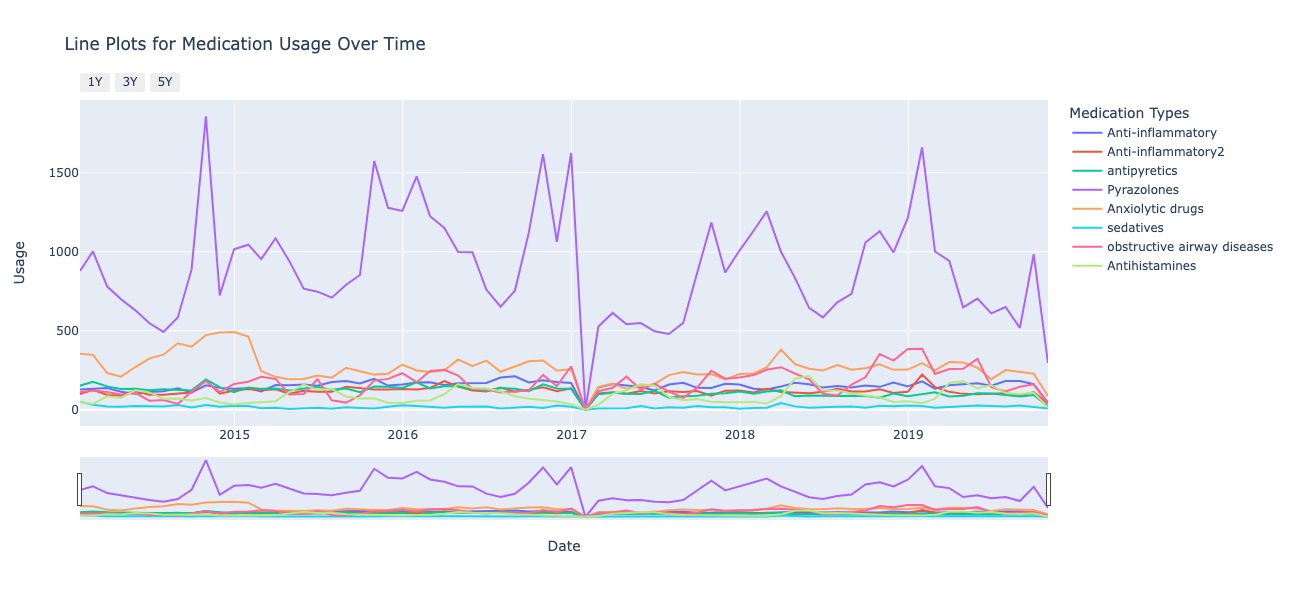

In [19]:


import plotly.graph_objects as go

# Create line plots for each column
fig = go.Figure()
for column in df.columns[1:]:  # Exclude 'Date' column
    fig.add_trace(go.Scatter(x=df['Date'], y=df[column], mode='lines', name=column))

# Update layout for better readability
fig.update_layout(
    title="Line Plots for Medication Usage Over Time",
    xaxis_title="Date",
    yaxis_title="Usage",
    legend_title="Medication Types",
    width=1200,
    height=600,
    xaxis=dict(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(count=3, label="3Y", step="year", stepmode="backward"),
                dict(count=5, label="5Y", step="year", stepmode="backward"),
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show plot
fig.show()


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

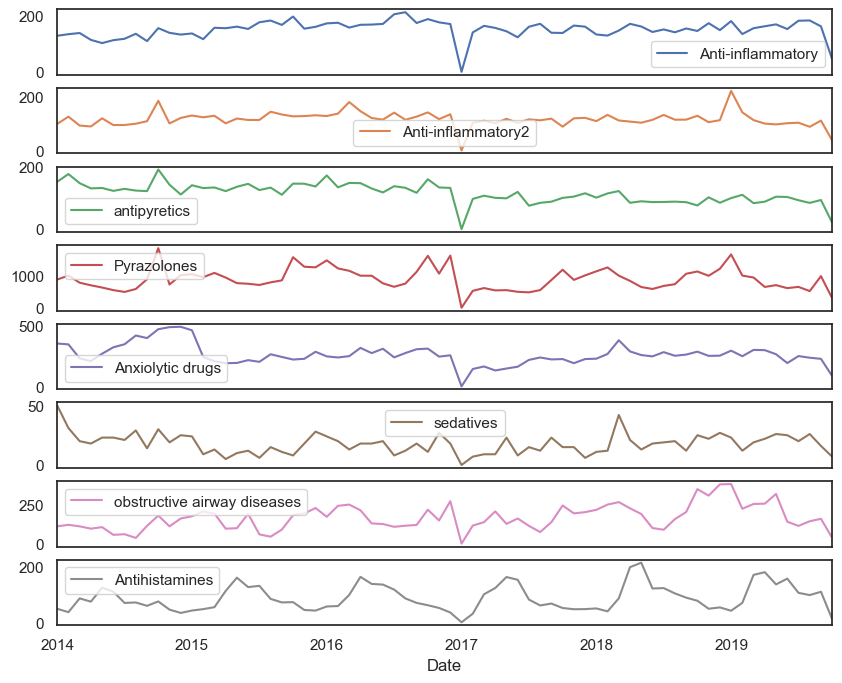

In [25]:

df.set_index('Date')[['Anti-inflammatory','Anti-inflammatory2','antipyretics','Pyrazolones','Anxiolytic drugs','sedatives','obstructive airway diseases','Antihistamines']].plot(subplots=True)

In [20]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures :\n" ,df.columns.tolist())
print ("\nMissing values :", df.isnull().any())
print ("\nUnique values :\n",df.nunique())


Rows     :  70
Columns  :  9

Features :
 ['Date', 'Anti-inflammatory', 'Anti-inflammatory2', 'antipyretics', 'Pyrazolones', 'Anxiolytic drugs', 'sedatives', 'obstructive airway diseases', 'Antihistamines']

Missing values : Date                           False
Anti-inflammatory              False
Anti-inflammatory2             False
antipyretics                   False
Pyrazolones                    False
Anxiolytic drugs               False
sedatives                      False
obstructive airway diseases    False
Antihistamines                 False
dtype: bool

Unique values :
 Date                           70
Anti-inflammatory              70
Anti-inflammatory2             70
antipyretics                   70
Pyrazolones                    70
Anxiolytic drugs               66
sedatives                      29
obstructive airway diseases    60
Antihistamines                 70
dtype: int64


In [26]:
 # Assuming df is your original DataFrame with columns 'Date', 'Anti-inflammatory', 'Anti-inflammatory2', etc.

# Create a dictionary to store the separated DataFrames
dfs = {}

# Iterate over each column except the Date column
for column in df.columns[1:]:
    # Create a new DataFrame with the Date column and the current column
    new_df = pd.DataFrame({'Date': df['Date'], column: df[column]})
    # Store the new DataFrame in the dictionary with the column name as the key
    dfs[column] = new_df

# Access each separated DataFrame by its column name
for column, separated_df in dfs.items():
    print(f"Separated DataFrame for column '{column}':\n{separated_df}\n")

Separated DataFrame for column 'Anti-inflammatory':
         Date  Anti-inflammatory
0  2014-01-31             127.69
1  2014-02-28             133.32
2  2014-03-31             137.44
3  2014-04-30             113.10
4  2014-05-31             101.79
..        ...                ...
65 2019-06-30             151.54
66 2019-07-31             181.00
67 2019-08-31             181.91
68 2019-09-30             161.07
69 2019-10-31              44.37

[70 rows x 2 columns]

Separated DataFrame for column 'Anti-inflammatory2':
         Date  Anti-inflammatory2
0  2014-01-31              99.090
1  2014-02-28             126.050
2  2014-03-31              92.950
3  2014-04-30              89.475
4  2014-05-31             119.933
..        ...                 ...
65 2019-06-30             101.627
66 2019-07-31             103.541
67 2019-08-31              88.269
68 2019-09-30             111.437
69 2019-10-31              37.300

[70 rows x 2 columns]

Separated DataFrame for column 'antipyretic

In [43]:
# printing each column name with date
dfs["Pyrazolones"]

,Date,Pyrazolones
0,2014-01-31,878.030
1,2014-02-28,1001.900
2,2014-03-31,779.275
3,2014-04-30,698.500
4,2014-05-31,628.780
...,...,...
65,2019-06-30,610.000
66,2019-07-31,649.800
67,2019-08-31,518.100
68,2019-09-30,984.480


In [42]:
d1= dfs["Pyrazolones"]
d1

,Date,Pyrazolones
0,2014-01-31,878.030
1,2014-02-28,1001.900
2,2014-03-31,779.275
3,2014-04-30,698.500
4,2014-05-31,628.780
...,...,...
65,2019-06-30,610.000
66,2019-07-31,649.800
67,2019-08-31,518.100
68,2019-09-30,984.480


In [44]:
# Find start and end dates
start_date = d1['Date'].min().date()
end_date = d1['Date'].max().date()

# Print start and end dates
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2014-01-31
End Date: 2019-10-31


In [58]:

train=d1[(d1['Date'] >= '2014-01-31') & (d1['Date'] <= '2018-09-09')]
test=d1[(d1['Date'] > '2018-09-09')]

In [47]:
# print("train datset:", train)
# print("test dataset:", test)

In [61]:
train.count()
train.shape

(56, 2)

In [63]:
test.count()
test.shape

(14, 2)

In [66]:
# The verbose parameter controls the level of detail or verbosity of the output during the training process 
# Here's what each value of verbose typically represents:

# verbose=0: Silent mode. No output will be printed during the training process.
# verbose=1: Default mode. Progress bars and some other information may be printed to the console during training.
# verbose=2: Verbose mode. More detailed information, such as epoch progress and loss metrics, will be printed during training.

model = auto_timeseries(score_type='rmse', time_interval='M', model_type=['best'], verbose=2)

Start of Fit.....
    Target variable given as = Pyrazolones
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Pyrazolones']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (56, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


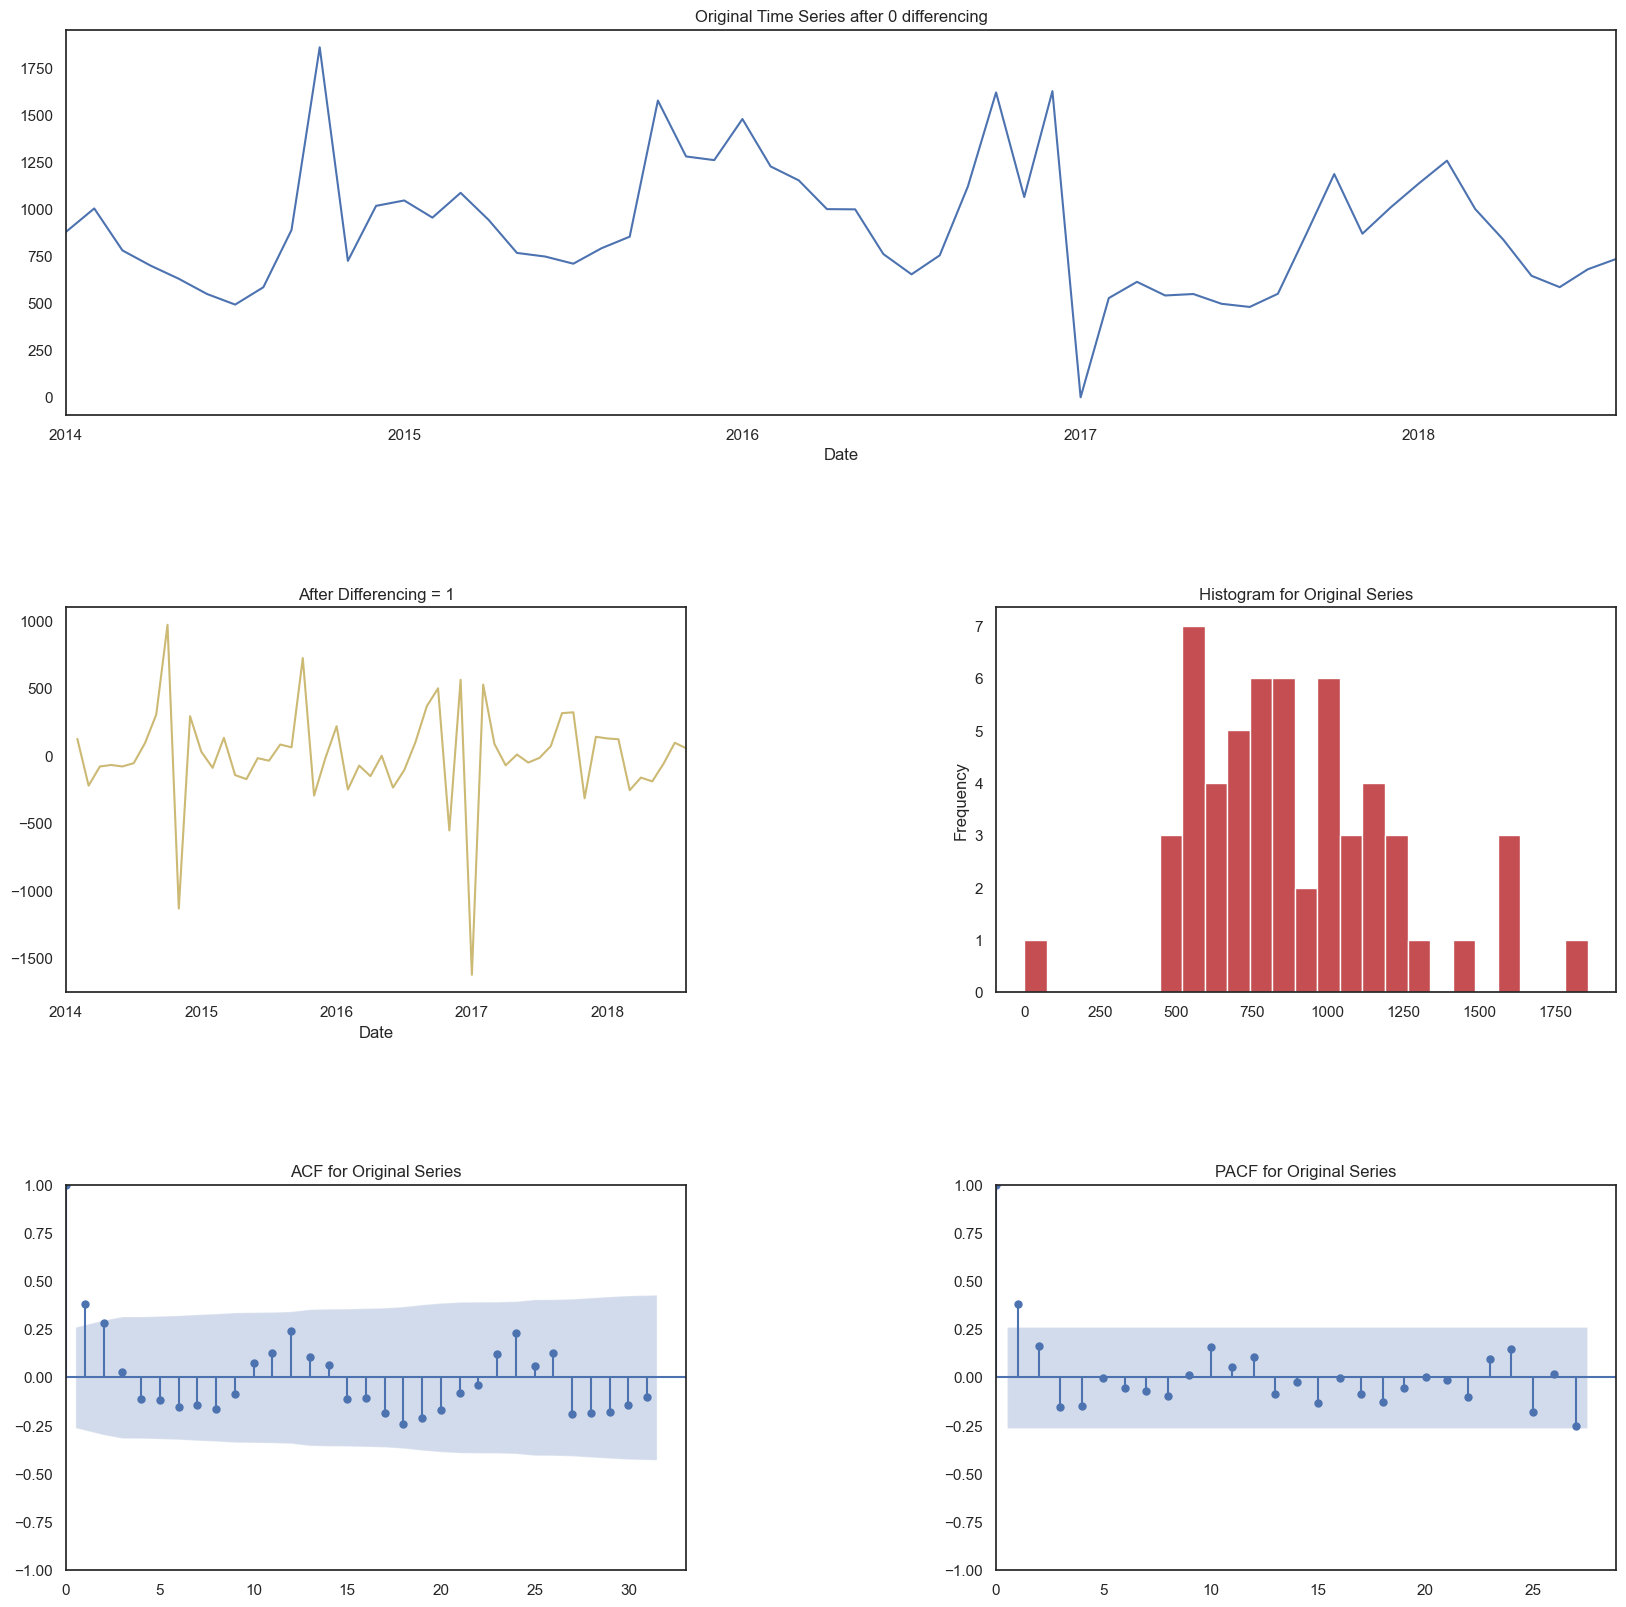

16:39:33 - cmdstanpy - INFO - Chain [1] start processing
16:39:33 - cmdstanpy - INFO - Chain [1] done processing


Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(56, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 41 Test Shape: 5


16:39:34 - cmdstanpy - INFO - Chain [1] start processing
16:39:34 - cmdstanpy - INFO - Chain [1] done processing
16:39:34 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 205.11
    Std Deviation of actuals = 273.25
    Normalized RMSE (as pct of std dev) = 75%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 46 Test Shape: 5
    RMSE = 422.38
    Std Deviation of actuals = 131.78
    Normalized RMSE (as pct of std dev) = 321%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 51 Test Shape: 5


16:39:34 - cmdstanpy - INFO - Chain [1] done processing
16:39:34 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 87.80
    Std Deviation of actuals = 85.35
    Normalized RMSE (as pct of std dev) = 103%
Cross Validation window: 3 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 190.58
    MSE (Mean Squared Error = 76060.32
    MAPE (Mean Absolute Percent Error) = 20%
    RMSE (Root Mean Squared Error) = 275.7904
    Normalized RMSE (MinMax) = 36%
    Normalized RMSE (as Std Dev of Actuals)= 109%
Time Taken = 1 seconds


16:39:34 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 41 Test Shape: 5

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=683.917, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=616.608, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=657.864, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=610.524, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=612.353, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=609.598, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=610.732, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=642.591, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[

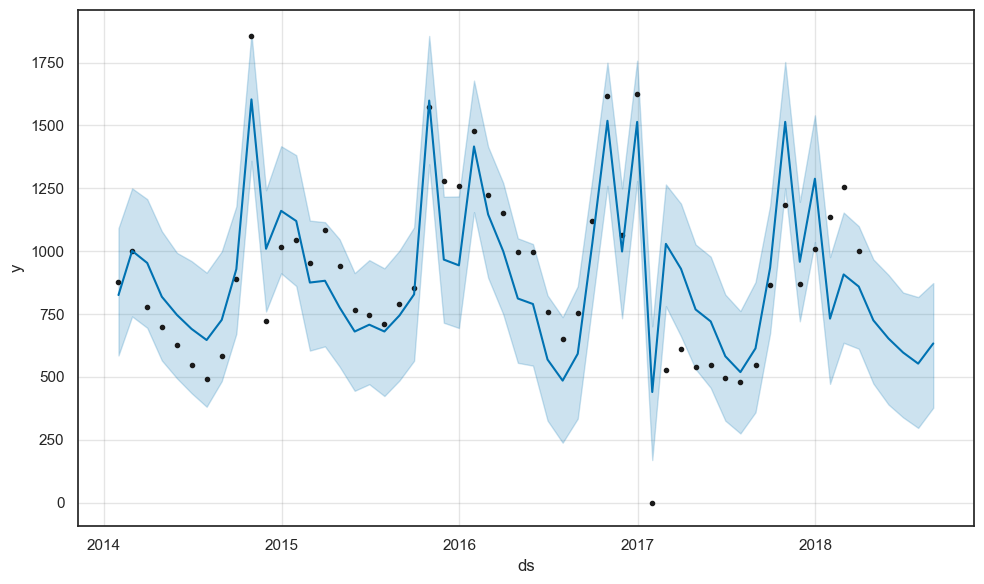

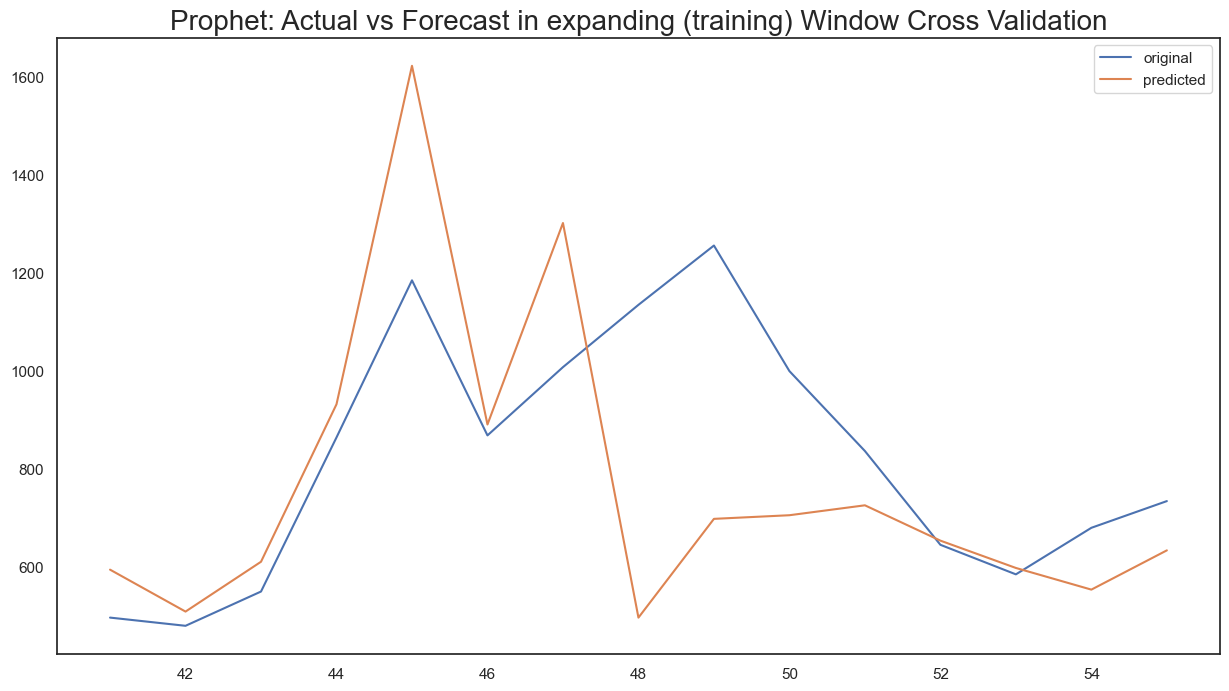

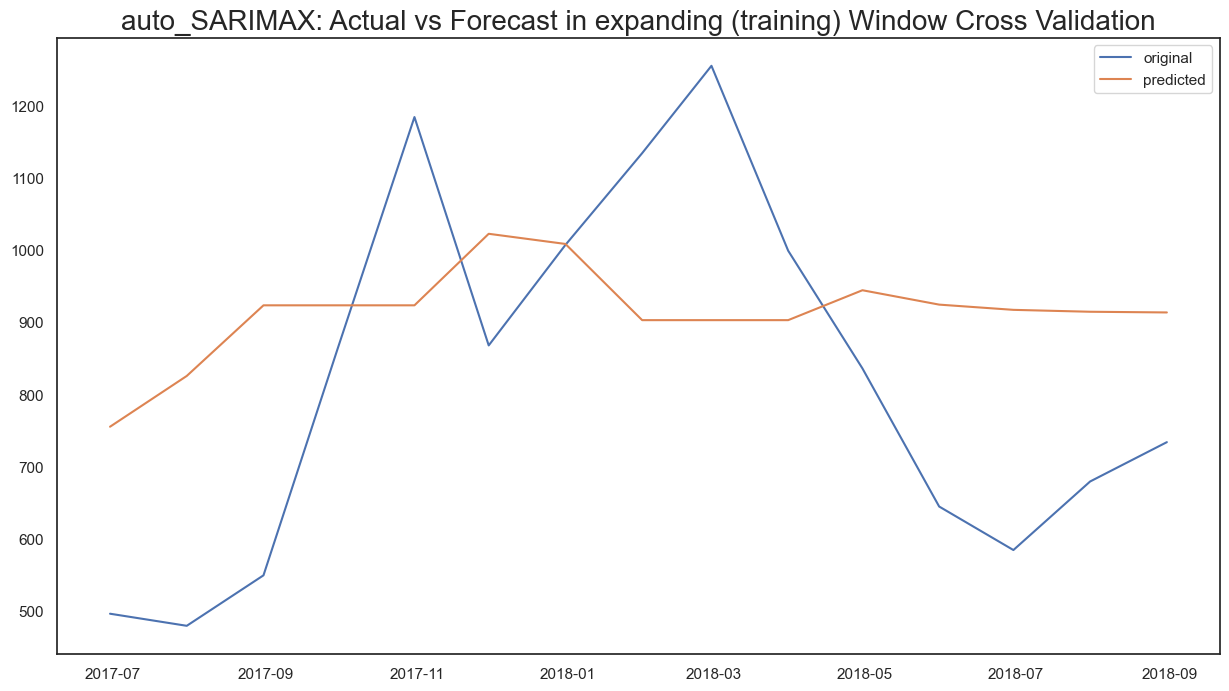

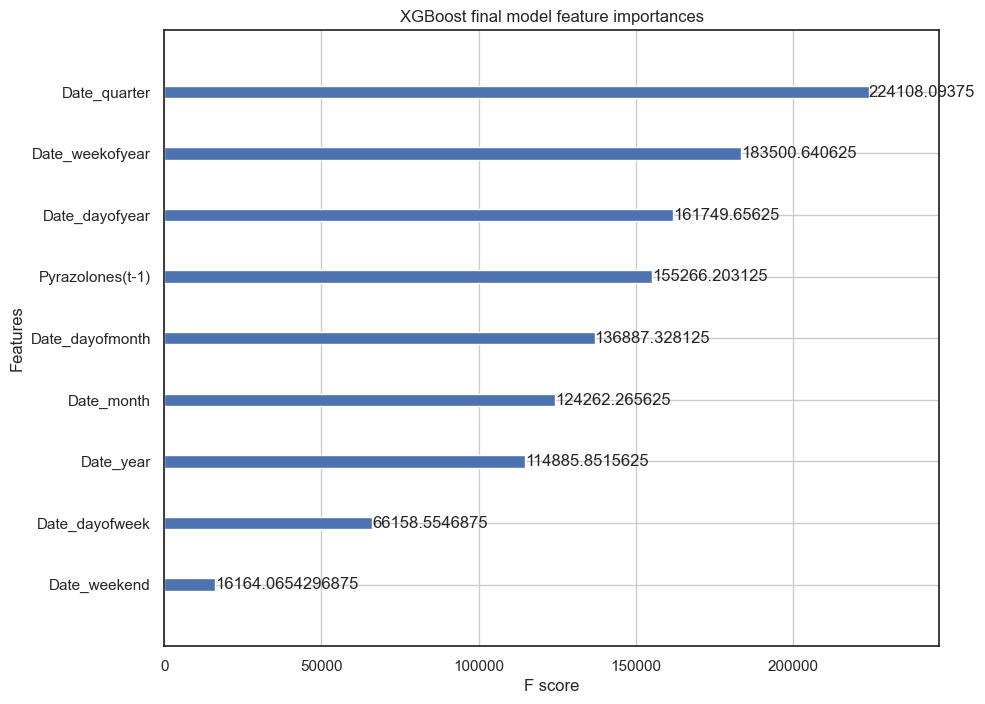

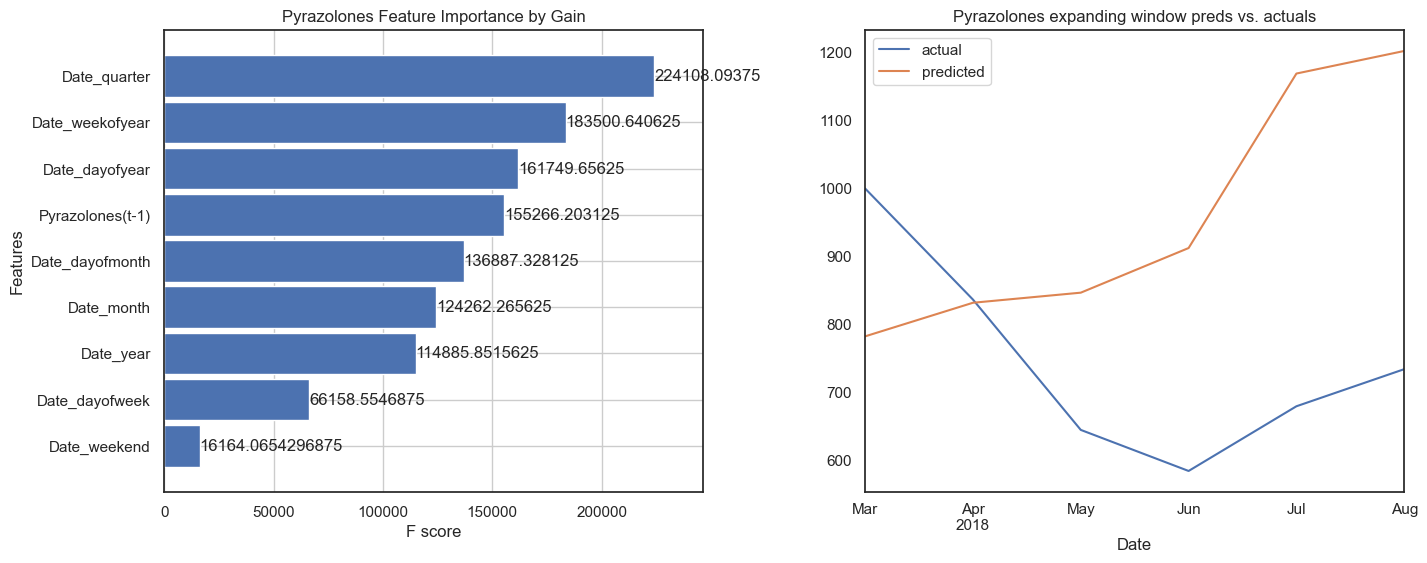

In [67]:
# cv=3 in machine learning typically refers to cross-validation with 3 folds. 
# Cross-validation is a technique used to assess the performance of a predictive model. In 3-fold cross-validation:

# The dataset is divided into 3 equal parts or folds.
# The model is trained on 2 folds and validated on the remaining fold. This process is repeated 3 times, each time using a different fold as the validation set.
# The performance metrics (e.g., accuracy, loss) from each fold are averaged to obtain a single performance estimate for the model.

model.fit(traindata=train[['Date','Pyrazolones']], ts_column='Date', target='Pyrazolones', cv=3)